### How to embed Emojis in an Altair Chart

I was curious about how to reproduce this sample chart from Altair that uses drawings of pigs and cattle: https://altair-viz.github.io/gallery/isotype.html

However, this chart requires some low level drawing to get the pigs/cattle images which I didn't want to get into for a quick and dirty chart.  But I found this example in Vega that uses emojis and wanted to try to reproduce it in Altair:
https://vega.github.io/vega-lite/examples/isotype_bar_chart_emoji.html

#The calculate transform allows the user to define new fields in the dataset which are calculated from other fields using an expression syntax.

idea to just use text from here: https://altair-viz.github.io/gallery/scatter_with_labels.html#gallery-scatter-with-labels


In [47]:
#!conda install -c conda-forge altair vega_datasets notebook vega -y

In [48]:
import altair as alt
import pandas as pd
alt.renderers.enable('notebook') # show and interact ith plots in jupyter notebook

RendererRegistry.enable('notebook')

First let's set up the dataframe used in both examples

In [49]:
df =  pd.DataFrame([
      {'country': 'Great Britain', 'animal': 'cattle', 'col': 3},
      {'country': 'Great Britain', 'animal': 'cattle', 'col': 2},
      {'country': 'Great Britain', 'animal': 'cattle', 'col': 1},
      {'country': 'Great Britain', 'animal': 'pigs', 'col': 2},
      {'country': 'Great Britain', 'animal': 'pigs', 'col': 1},
      {'country': 'Great Britain', 'animal': 'sheep', 'col': 10},
      {'country': 'Great Britain', 'animal': 'sheep', 'col': 9},
      {'country': 'Great Britain', 'animal': 'sheep', 'col': 8},
      {'country': 'Great Britain', 'animal': 'sheep', 'col': 7},
      {'country': 'Great Britain', 'animal': 'sheep', 'col': 6},
      {'country': 'Great Britain', 'animal': 'sheep', 'col': 5},
      {'country': 'Great Britain', 'animal': 'sheep', 'col': 4},
      {'country': 'Great Britain', 'animal': 'sheep', 'col': 3},
      {'country': 'Great Britain', 'animal': 'sheep', 'col': 2},
      {'country': 'Great Britain', 'animal': 'sheep', 'col': 1},
      {'country': 'United States', 'animal': 'cattle', 'col': 9},
      {'country': 'United States', 'animal': 'cattle', 'col': 8},
      {'country': 'United States', 'animal': 'cattle', 'col': 7},
      {'country': 'United States', 'animal': 'cattle', 'col': 6},
      {'country': 'United States', 'animal': 'cattle', 'col': 5},
      {'country': 'United States', 'animal': 'cattle', 'col': 4},
      {'country': 'United States', 'animal': 'cattle', 'col': 3},
      {'country': 'United States', 'animal': 'cattle', 'col': 2},
      {'country': 'United States', 'animal': 'cattle', 'col': 1},
      {'country': 'United States', 'animal': 'pigs', 'col': 6},
      {'country': 'United States', 'animal': 'pigs', 'col': 5},
      {'country': 'United States', 'animal': 'pigs', 'col': 4},
      {'country': 'United States', 'animal': 'pigs', 'col': 3},
      {'country': 'United States', 'animal': 'pigs', 'col': 2},
      {'country': 'United States', 'animal': 'pigs', 'col': 1},
      {'country': 'United States', 'animal': 'sheep', 'col': 7},
      {'country': 'United States', 'animal': 'sheep', 'col': 6},
      {'country': 'United States', 'animal': 'sheep', 'col': 5},
      {'country': 'United States', 'animal': 'sheep', 'col': 4},
      {'country': 'United States', 'animal': 'sheep', 'col': 3},
      {'country': 'United States', 'animal': 'sheep', 'col': 2},
      {'country': 'United States', 'animal': 'sheep', 'col': 1}
    ])

df.head()

,animal,col,country
0,cattle,3,Great Britain
1,cattle,2,Great Britain
2,cattle,1,Great Britain
3,pigs,2,Great Britain
4,pigs,1,Great Britain


Stuff a column into our dataframe that contains the correct emoji for each animal type

In [50]:
# add emoji column
df['emoji'] =[{'cattle': '🐄', 'pigs': '🐖', 'sheep': '🐏'}[animal] for animal in df['animal'] ]
df.head()

,animal,col,country,emoji
0,cattle,3,Great Britain,🐄
1,cattle,2,Great Britain,🐄
2,cattle,1,Great Britain,🐄
3,pigs,2,Great Britain,🐖
4,pigs,1,Great Britain,🐖


now show the chart

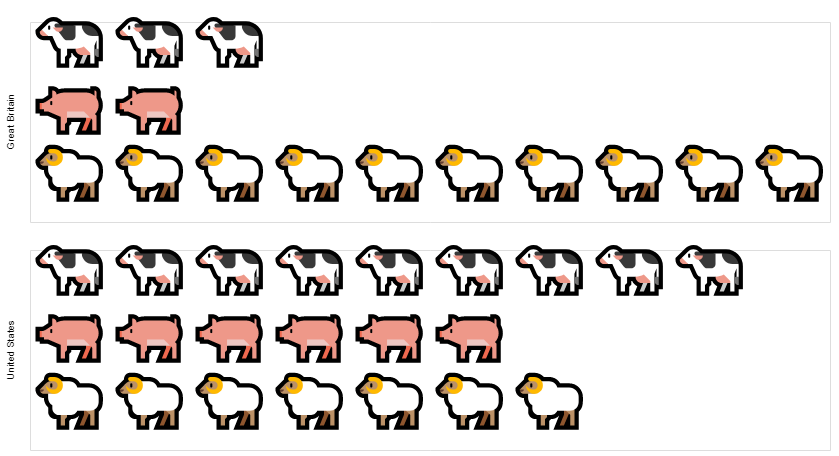

In [51]:
# the SizeValue controls the size of the emoji drawing that is produced
alt.Chart(df).mark_text(filled=True).encode(
    alt.X('col:O', axis=None),
    alt.Y('animal:O', axis=None),
    alt.Row('country:N', header=alt.Header(title='')),
    alt.SizeValue(60),
    text='emoji'
).properties(width=800, height=200)

Now that that's working ok, let's try to expand to a dataset I have tracking the proportion of cat/dog licenses issued in the City of Toronto in 2017 in each neighbourhood (defined as a FSA - Forward Sortation Area -- the first three digits of the Canadian Postal Code

First set up a simple dataframe

In [52]:
catdog = pd.DataFrame({
    'FSA': ['M1X', 'M5G', 'M4H', 'M5C', 'M5H'],
    'PropDogs': [76.35, 63.36,54.76, 20.10, 10.5]
})
catdog

,FSA,PropDogs
0,M1X,76.35
1,M5G,63.36
2,M4H,54.76
3,M5C,20.10
4,M5H,10.50


In [53]:
# We have the proportion of Dogs, but to simplify charting, let's add in a column with the proportion of cat licences
catdog['PropCats']=100-catdog['PropDogs']
catdog

,FSA,PropDogs,PropCats
0,M1X,76.35,23.65
1,M5G,63.36,36.64
2,M4H,54.76,45.24
3,M5C,20.10,79.90
4,M5H,10.50,89.50


Melt our dataframe in order to have the proportion of cats and dogs in separate rows for each FSA so we can add in our emoji column for each

In [54]:
catdog=catdog.melt(id_vars ='FSA')
catdog

,FSA,variable,value
0,M1X,PropDogs,76.35
1,M5G,PropDogs,63.36
2,M4H,PropDogs,54.76
3,M5C,PropDogs,20.10
4,M5H,PropDogs,10.50
5,M1X,PropCats,23.65
6,M5G,PropCats,36.64
7,M4H,PropCats,45.24
8,M5C,PropCats,79.90
9,M5H,PropCats,89.50


In [55]:
# transform scale of value to 1-10
catdog['value']=(catdog['value']/10)
catdog.head()

,FSA,variable,value
0,M1X,PropDogs,7.635
1,M5G,PropDogs,6.336
2,M4H,PropDogs,5.476
3,M5C,PropDogs,2.010
4,M5H,PropDogs,1.050


Add in a column containing our Emojis -- add in as many emojis as there are proportion of that animal

In [56]:
# add emoji column#🐈🐕
catdog['emoji'] =[{'PropCats': '🐈', 'PropDogs': '🐕'}[animal] *int(value) for animal,value in catdog[['variable','value']].values ]
catdog.head()

,FSA,variable,value,emoji
0,M1X,PropDogs,7.635,🐕🐕🐕🐕🐕🐕🐕
1,M5G,PropDogs,6.336,🐕🐕🐕🐕🐕🐕
2,M4H,PropDogs,5.476,🐕🐕🐕🐕🐕
3,M5C,PropDogs,2.010,🐕🐕
4,M5H,PropDogs,1.050,🐕


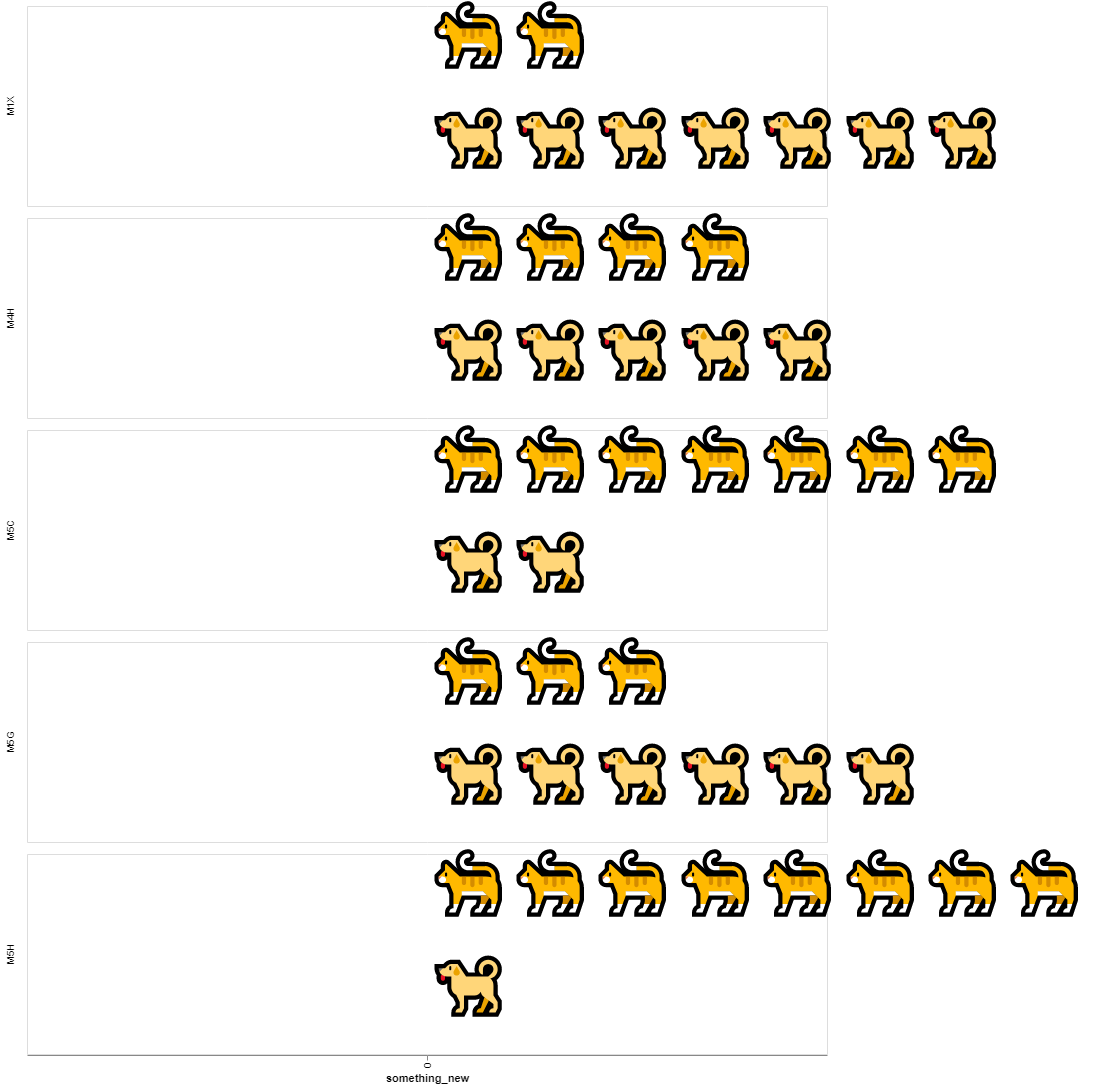

In [57]:
alt.Chart(catdog).mark_text(align='left').encode(
    alt.X('something_new:O', axis=alt.Axis(format='.0%')),
    alt.Y('variable:O', axis=None),
    alt.Row('FSA:N', header=alt.Header(title='')),
    alt.SizeValue(60),
    text='emoji'
    #alt.Text('emoji' )
).properties(width=800, height=200
).transform_calculate(
    something_new='0'
)


In [58]:
# catdog['dumb'] = 0
# catdog

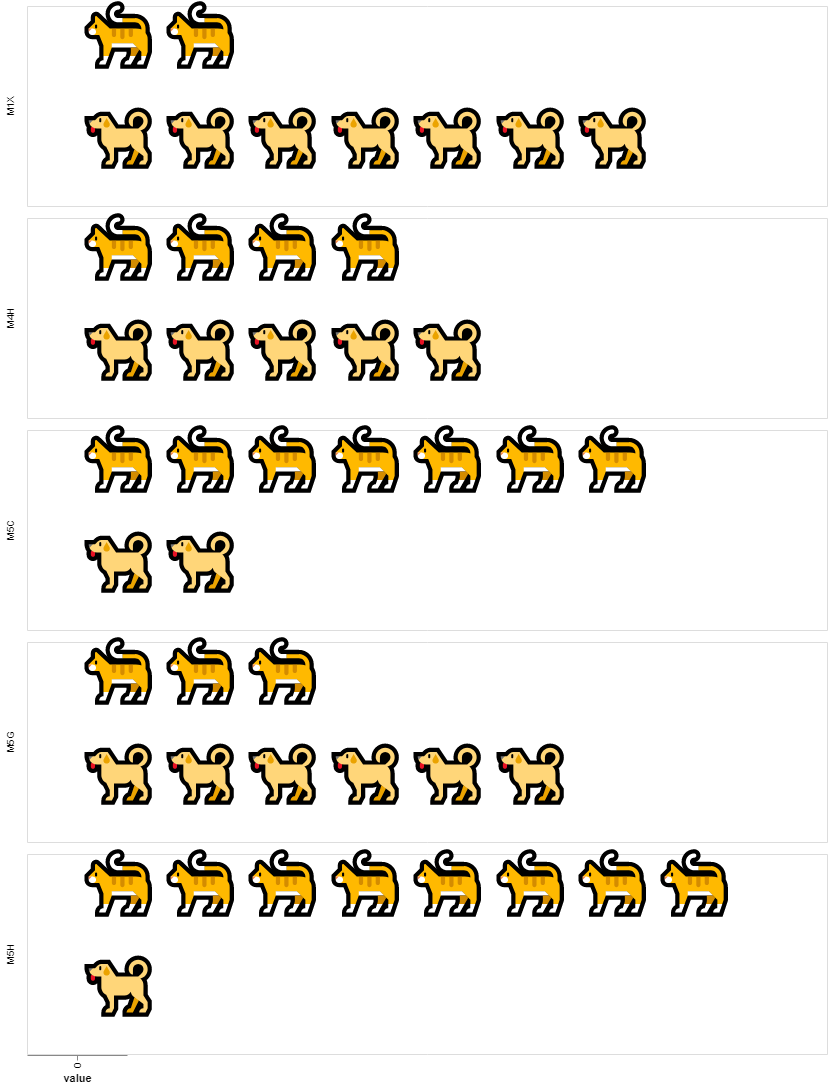

In [59]:

# having trouble with all emojis starting to show in the middle of the chart
# got around it by using scale
alt.Chart(catdog).mark_text(align='left').encode(
    alt.X('value:O', axis=alt.Axis(format='.0%'),scale=alt.Scale(range=[0,100])),
    alt.Y('variable:O', axis=None),
    alt.Row('FSA:N', header=alt.Header(title='')),
    alt.SizeValue(60),
    text='emoji'
    #alt.Text('emoji' )
).properties(width=800, height=200
).transform_calculate(
   value='0'
)
